# Representative-based / Prototype-based Clustering

**Load necessary packages and apply custom configurations**

In [1]:
import warnings; 
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['grid.linestyle'] = ':'   
plt.rcParams['axes.grid'] = False

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.color_palette("RdBu", n_colors=10)

# Interactive plots embedded within the notebook
#%matplotlib notebook 
# Static images of plots embedded within the notebook
%matplotlib inline   
%config InlineBackend.figure_formats = {'png', 'retina'}

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
import sklearn as sk

#pd.options.plotting.backend = "plotly" 
# Conflict with options in original matplotlib.

print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)
print('Seaborn version', sns.__version__)
print('Statsmodels version', sm.__version__)
print('Sklearn version', sk.__version__)

Numpy version 1.20.1
Pandas version 1.2.4
Seaborn version 0.11.1
Statsmodels version 0.12.2
Sklearn version 0.24.1


In [2]:
font_size=13
params = {'legend.fontsize': 'large',
          'figure.figsize': (5,4),
          'axes.labelsize': font_size,
          'axes.titlesize': font_size,
          'xtick.labelsize': font_size*0.8,
          'ytick.labelsize': font_size*0.8,
          'axes.titlepad': 25}
plt.rcParams.update(params)

## K-Means clustering

### Load the data

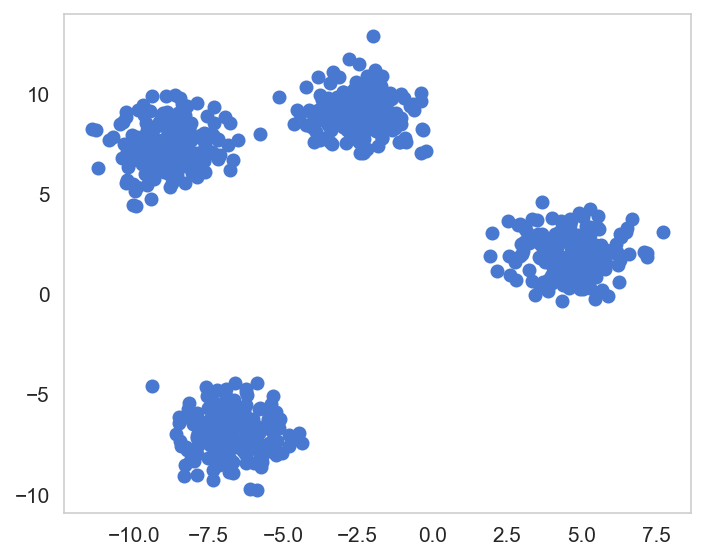

In [3]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=800, centers=4, random_state=42)

plt.figure(figsize=(5,4))
plt.scatter(X[:, 0], X[:, 1]);
plt.tight_layout();

### Fit K-means model

<font color='blue'> Import the KMeans function, specify the number of clusters $K$ and fit the K-means model.  
    
Run ```pip install --upgrade threadpoolctl==3.1.0``` if fit() generates errors.

In [4]:
from sklearn.cluster import KMeans
# Number of clusters
K = 6
# Fit the input data
kmeans = KMeans(n_clusters=K, n_init=10).fit(X)

<font color='blue'>Get the cluster labels, sum of squared distance, and cluster centroids

In [5]:
# Get the cluster labels
labels = kmeans.predict(X) # or use kmeans.labels
# Get sum of squares distance of all points
sse = kmeans.inertia_
# Centroid values
centroids = kmeans.cluster_centers_

In [6]:
np.set_printoptions(precision=3)
print(f"Sum of squared errors : {sse:.3f}")
print(f"\nCentroids : \n {centroids}") 

Sum of squared errors : 1268.576

Centroids : 
 [[-2.501  9.053]
 [-6.772 -6.073]
 [ 4.592  1.95 ]
 [-8.374  8.232]
 [-9.189  6.671]
 [-6.562 -7.788]]


### Visualize the clustering 

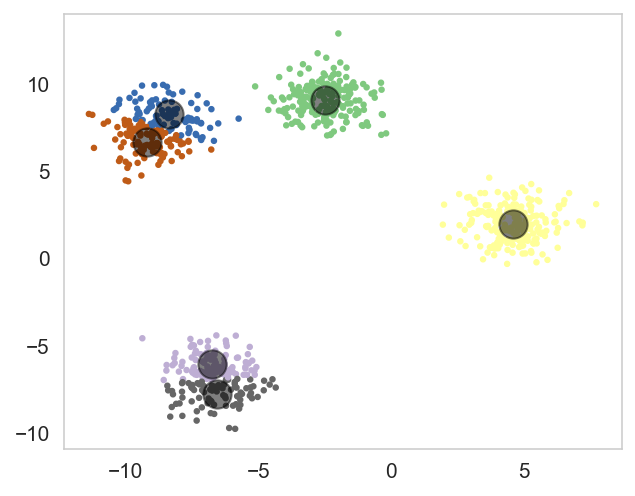

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='Accent')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Elbow method

<font color='blue'>Determine SSE for different number of clusters $K$

In [8]:
sse = {}
for k in range(1, 10):
 kmeans = KMeans(n_clusters=k).fit(X)
 sse[k] = kmeans.inertia_

<font color='blue'>Plot SSE vs. the number of cluster $K$

Text(0.5, 0, 'Number of Clusters (K)')

Text(0, 0.5, 'SSE (Sum of Squared Errors)')

Text(0.5, 1.0, 'Elbow Method for Optimal K')

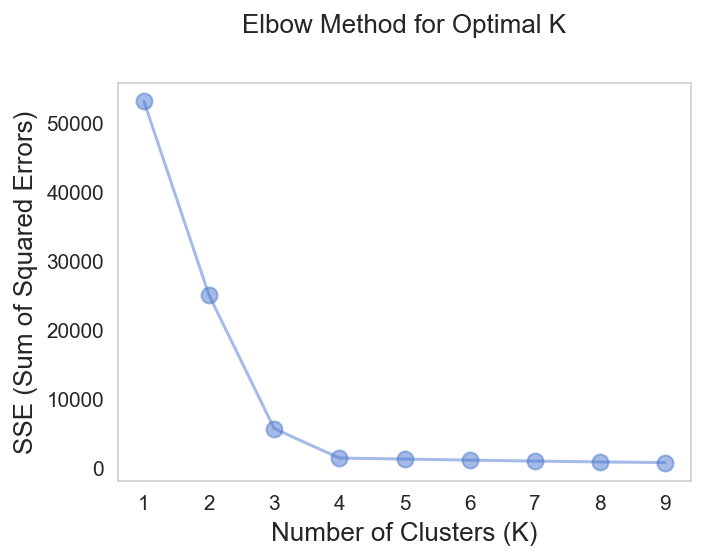

In [9]:
_, ax = plt.subplots(figsize=(5, 4))
ax.plot(list(sse.keys()), list(sse.values()), marker='o', alpha=0.5, ms=8)
ax.set_xlabel('Number of Clusters (K)')
ax.set_ylabel('SSE (Sum of Squared Errors)')
ax.set_title('Elbow Method for Optimal K')
plt.tight_layout()
plt.show()

### Other Clustering Indices

<font color='blue'>Silhouette coefficient

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters (K)')

Text(0.5, 0, 'Number of Clusters (K)')

Text(0, 0.5, 'Silhouette Score')

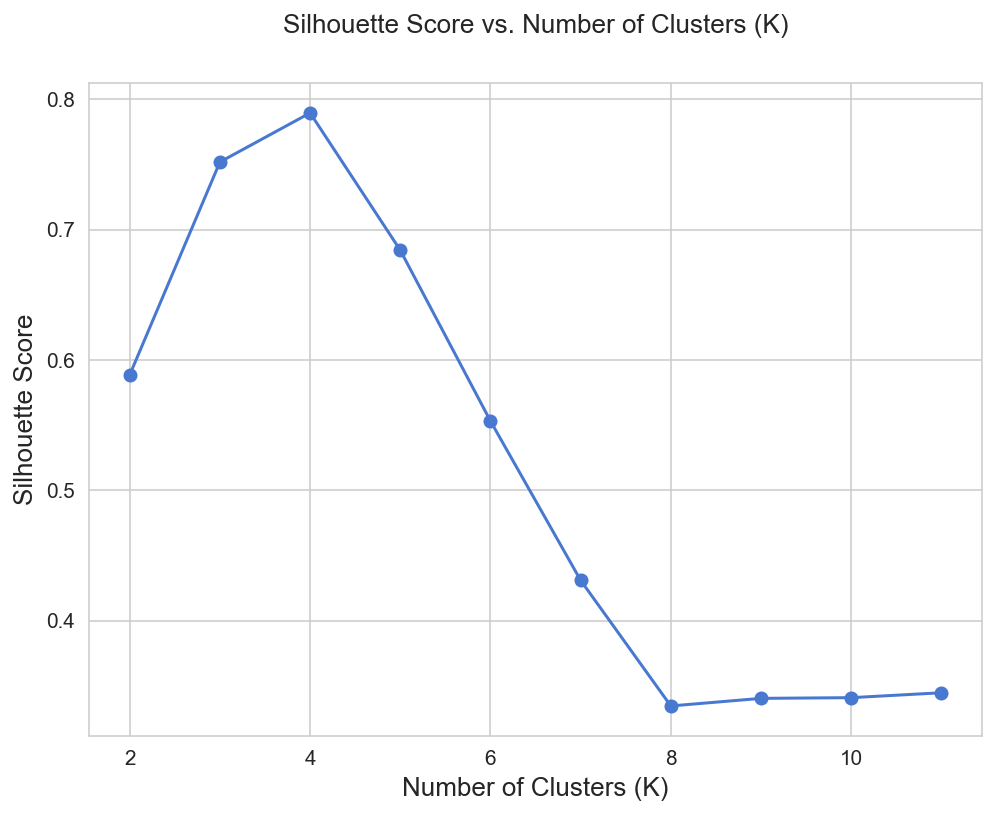

In [10]:
from sklearn.metrics import silhouette_score
# Lists to store silhouette scores
silhouette_scores = []

# Range of K values to test
K_values = range(2, 12)  # You can adjust the range as needed

for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42).fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(K_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

<font color='blue'>Calinski Harabasz Index

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Calinski-Harabasz Index vs. Number of Clusters (K)')

Text(0.5, 0, 'Number of Clusters (K)')

Text(0, 0.5, 'Calinski-Harabasz Index')

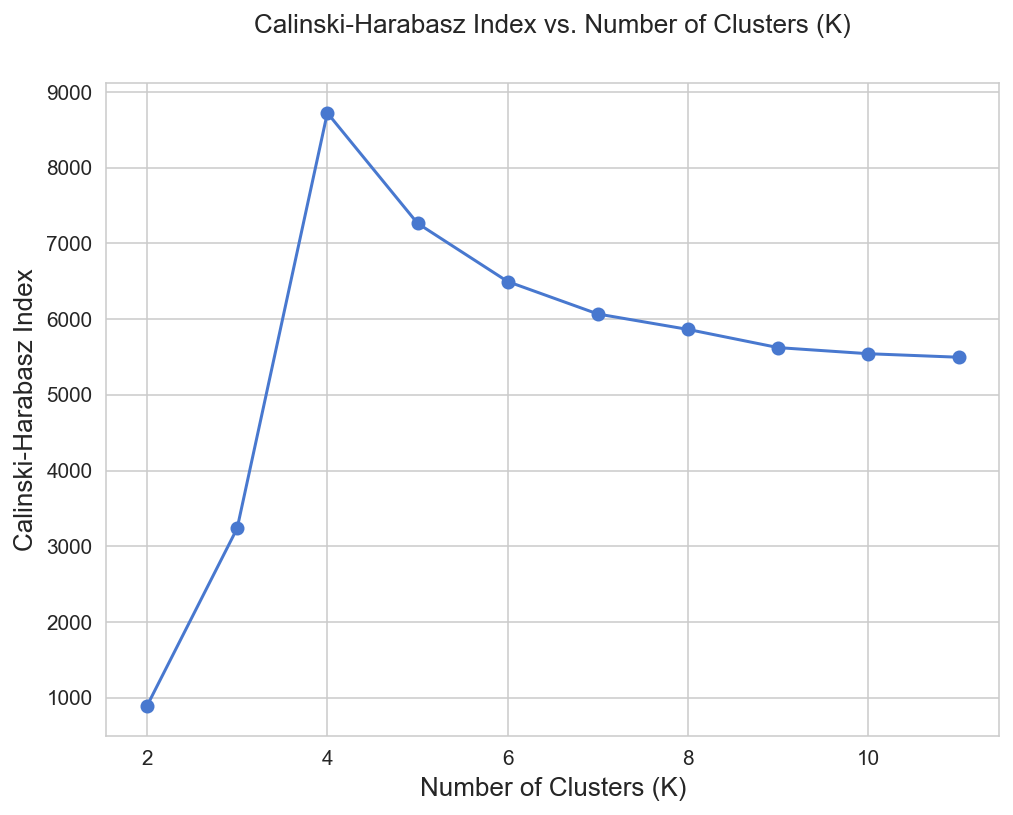

In [11]:
from sklearn.metrics import calinski_harabasz_score
# Lists to store Calinski-Harabasz scores
calinski_scores = []

# Range of K values to test
K_values = range(2, 12)  # You can adjust the range as needed

for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42).fit(X)
    labels = kmeans.labels_
    calinski_score = calinski_harabasz_score(X, labels)
    calinski_scores.append(calinski_score)

# Plot the Calinski-Harabasz scores
plt.figure(figsize=(8, 6))
plt.plot(K_values, calinski_scores, marker='o')
plt.title('Calinski-Harabasz Index vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Index')
plt.grid(True)
plt.show()

## <font color='orange'>In-class assignment : K-means Clustering<font>

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Scatter Plot of Combined Data')

Text(0.5, 0, 'X1')

Text(0, 0.5, 'X2')

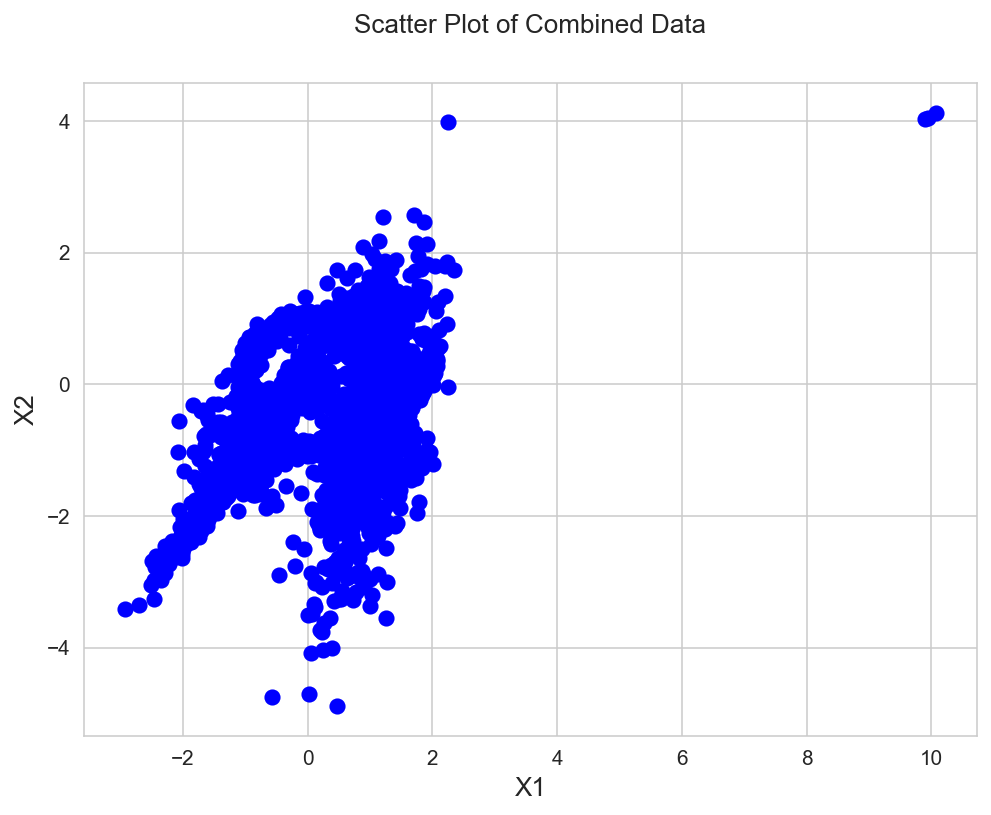

In [12]:
# Load data from all datasets
df1 = pd.read_excel('data/clustering-basics.xlsx', sheet_name='Dataset1')
df2 = pd.read_excel('data/clustering-basics.xlsx', sheet_name='Dataset2')
df3 = pd.read_excel('data/clustering-basics.xlsx', sheet_name='Dataset3')
df4 = pd.read_excel('data/clustering-basics.xlsx', sheet_name='Dataset4')

# Concatenate the data
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Assuming the dataset has columns 'X1' and 'X2'
X = combined_df[['X1', 'X2']]

# Create a scatter plot of the combined data
plt.figure(figsize=(8, 6))
plt.scatter(X['X1'], X['X2'], c='b', marker='o', s=50)
plt.title('Scatter Plot of Combined Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'K-Means Clustering of Combined Data')

Text(0.5, 0, 'X1')

Text(0, 0.5, 'X2')

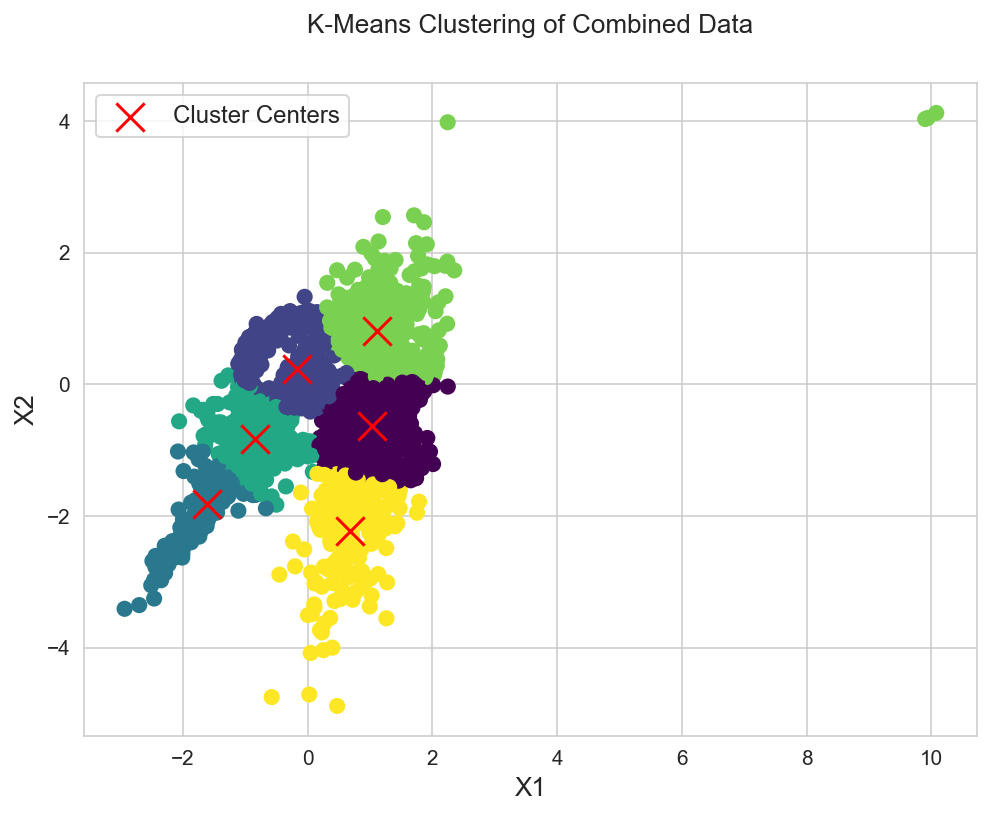

In [13]:
# Choose the number of clusters (K)
K = 6  # Adjust this based on your analysis

# Fit the K-Means model
kmeans = KMeans(n_clusters=K, random_state=42).fit(X)

# Get cluster labels
labels = kmeans.labels_

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X['X1'], X['X2'], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('K-Means Clustering of Combined Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

KMeans(n_clusters=11, random_state=42)

KMeans(n_clusters=12, random_state=42)

KMeans(n_clusters=13, random_state=42)

KMeans(n_clusters=14, random_state=42)

KMeans(n_clusters=15, random_state=42)

KMeans(n_clusters=16, random_state=42)

KMeans(n_clusters=17, random_state=42)

KMeans(n_clusters=18, random_state=42)

KMeans(n_clusters=19, random_state=42)

KMeans(n_clusters=20, random_state=42)

KMeans(n_clusters=21, random_state=42)

KMeans(n_clusters=22, random_state=42)

KMeans(n_clusters=23, random_state=42)

KMeans(n_clusters=24, random_state=42)

KMeans(n_clusters=25, random_state=42)

KMeans(n_clusters=26, random_state=42)

KMeans(n_clusters=27, random_state=42)

KMeans(n_clusters=28, random_state=42)

KMeans(n_clusters=29, random_state=42)

KMeans(n_clusters=30, random_state=42)

KMeans(n_clusters=31, random_state=42)

KMeans(n_clusters=32, random_state=42)

KMeans(n_clusters=33, random_state=42)

KMeans(n_clusters=34, random_state=42)

KMeans(n_clusters=35, random_state=42)

KMeans(n_clusters=36, random_state=42)

KMeans(n_clusters=37, random_state=42)

KMeans(n_clusters=38, random_state=42)

KMeans(n_clusters=39, random_state=42)

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method for Optimal K')

Text(0.5, 0, 'Number of Clusters (K)')

Text(0, 0.5, 'Sum of Squared Errors (SSE)')

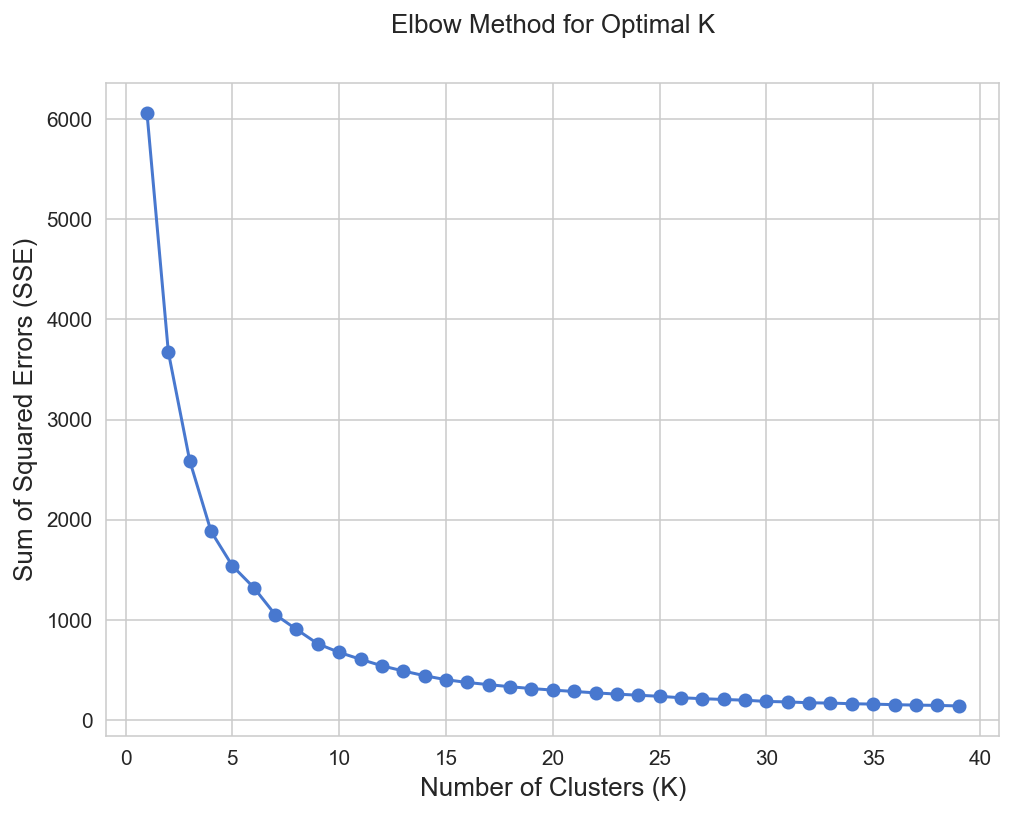

In [14]:
# Create a list to store the SSE (Sum of Squared Errors) for different K values
sse = []

# Define a range of K values to test
K_range = range(1, 40)  # You can adjust the range as needed

# Calculate SSE for each K value
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the SSE vs. K values to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters (K)')

Text(0.5, 0, 'Number of Clusters (K)')

Text(0, 0.5, 'Silhouette Score')

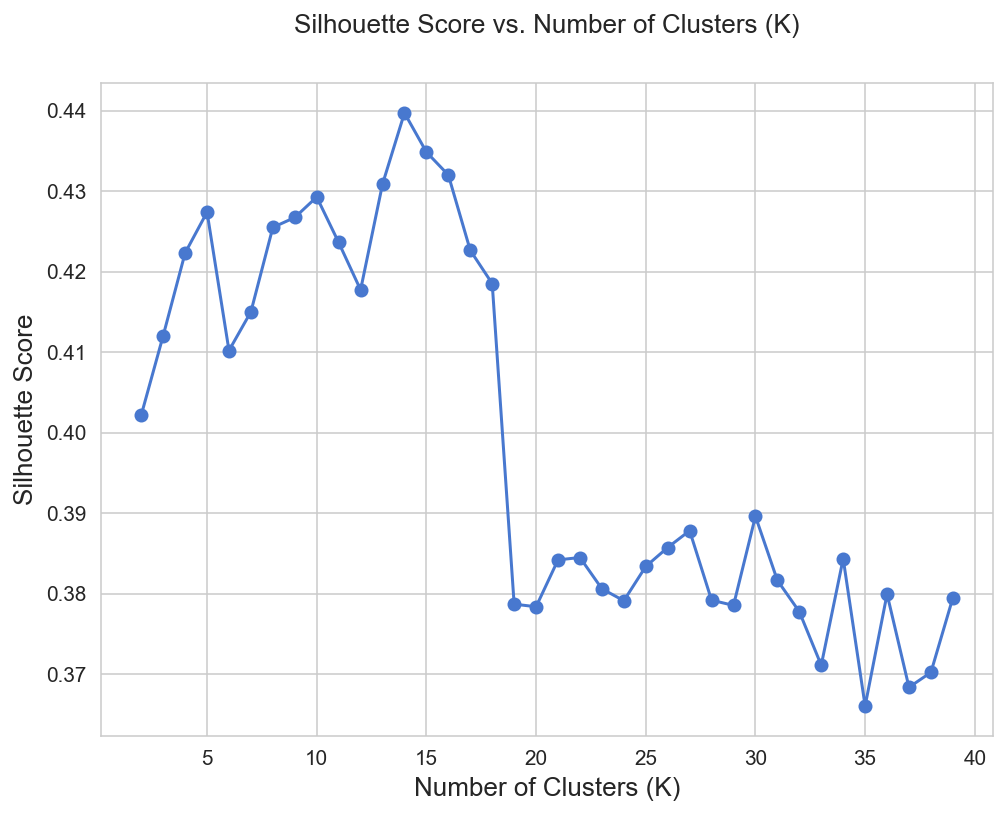

In [15]:
# Lists to store silhouette scores
silhouette_scores = []

# Range of K values to test
K_values = range(2, 40)  # You can adjust the range as needed

for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42).fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(K_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Calinski-Harabasz Index vs. Number of Clusters (K)')

Text(0.5, 0, 'Number of Clusters (K)')

Text(0, 0.5, 'Calinski-Harabasz Index')

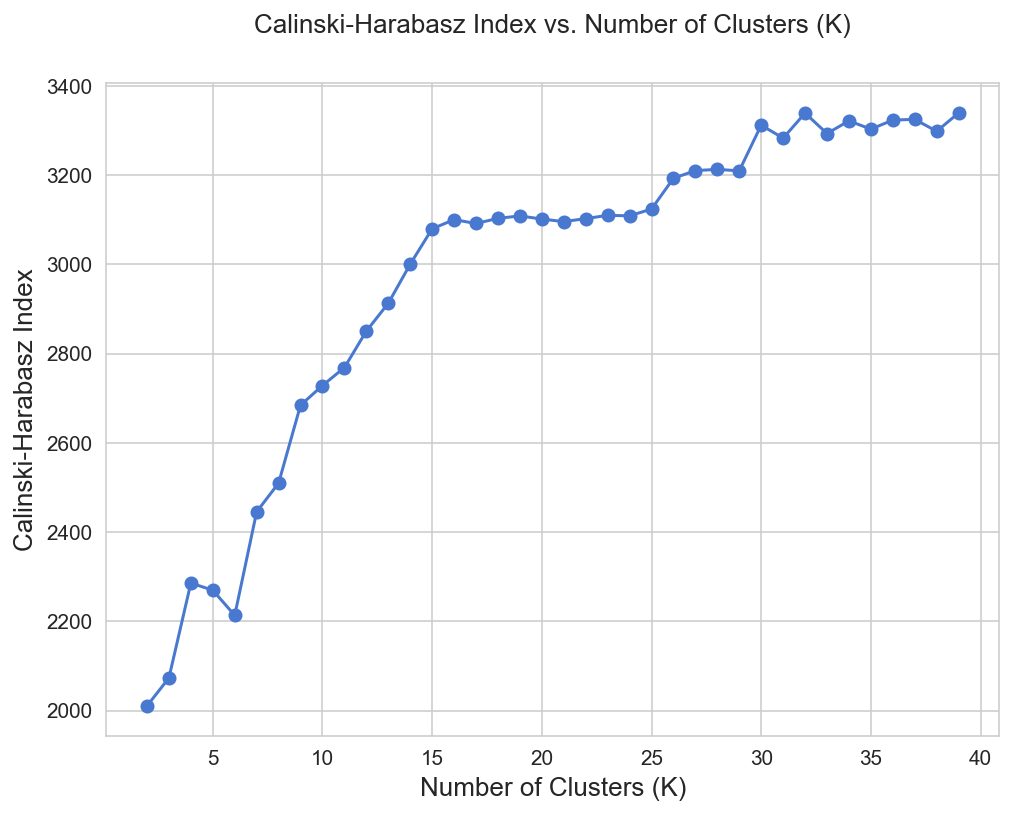

In [16]:
# Lists to store Calinski-Harabasz scores
calinski_scores = []

# Range of K values to test
K_values = range(2, 40)  # You can adjust the range as needed

for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42).fit(X)
    labels = kmeans.labels_
    calinski_score = calinski_harabasz_score(X, labels)
    calinski_scores.append(calinski_score)

# Plot the Calinski-Harabasz scores
plt.figure(figsize=(8, 6))
plt.plot(K_values, calinski_scores, marker='o')
plt.title('Calinski-Harabasz Index vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Index')
plt.grid(True)
plt.show()